In [9]:
import pandas as pd

cloak = pd.read_csv('Invisibility Cloak.csv')
print(cloak.head())
print(cloak.columns)
print(cloak['Cloak'].unique())
print(cloak['Cloak'].value_counts())
print(cloak['Participant'].unique())

   Participant  Cloak  Mischief
0            1      0         3
1            2      0         1
2            3      0         5
3            4      0         4
4            5      0         6
Index(['Participant', 'Cloak', 'Mischief'], dtype='object')
[0 1]
Cloak
0    12
1    12
Name: count, dtype: int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


It is continuous and theres two categorical and independent group assuming that participant id represent an individual.

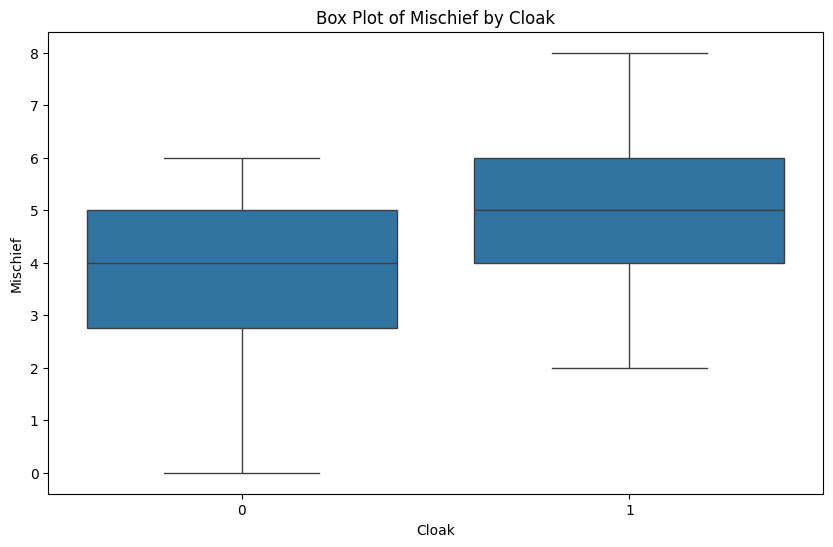

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cloak', y='Mischief', data=cloak)
plt.title('Box Plot of Mischief by Cloak')
plt.xlabel('Cloak')
plt.ylabel('Mischief')
plt.show()

There is no significant outliers assessed by visual insepctions

In [18]:
from scipy.stats import shapiro

with_cloak = cloak[cloak['Cloak'] == 1]
without_cloak = cloak[cloak['Cloak'] == 0]

sorted_without_mischief = without_cloak['Mischief'].sort_values()
sorted_with_mischief = with_cloak['Mischief'].sort_values()


statWithCloak, p_valueWithCloak = shapiro(sorted_with_mischief)
statWithoutCloak, p_valueWithoutCloak = shapiro(sorted_without_mischief)

print(f"Shapiro-Wilk Test Statistic for with cloak: {statWithCloak}, p-value: {p_valueWithCloak}")
print(f"Shapiro-Wilk Test Statistic for without cloak: {statWithoutCloak}, p-value: {p_valueWithoutCloak}")


Shapiro-Wilk Test Statistic for with cloak: 0.9726166907872743, p-value: 0.9361892037703956
Shapiro-Wilk Test Statistic for without cloak: 0.9127634937409543, p-value: 0.23144590729532177


The p-value is greater than 0.05 assuming that the allowable error is 5% thus it is normal

In [19]:
import numpy as np
from scipy.stats import t


mean_with_cloak = np.mean(with_cloak)
mean_without_cloak = np.mean(without_cloak)


var_with_cloak = np.var(with_cloak, ddof=1)
var_without_cloak = np.var(without_cloak, ddof=1)


n_with_cloak = len(with_cloak)
n_without_cloak = len(without_cloak)
pooled_std = np.sqrt(((n_with_cloak - 1) * var_with_cloak + (n_without_cloak - 1) * var_without_cloak) / (n_with_cloak + n_without_cloak - 2))


t_stat = (mean_with_cloak - mean_without_cloak) / (pooled_std * np.sqrt(1/n_with_cloak + 1/n_without_cloak))


df = n_with_cloak + n_without_cloak - 2

p_value = 2 * t.sf(np.abs(t_stat), df)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: Participant    3.226990
Cloak               inf
Mischief       6.511146
dtype: float64, p-value: [3.87728042e-03 0.00000000e+00 1.50269878e-06]


d:\GITHUB\clockDataSet_Empeno-FA7\env\Lib\site-packages\numpy\_core\fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
